In [1]:
from spectral_data_types.Channel import Channel
from spectral_data_types.Particle import Particle
from utils.misc import read_in_hdf5_spectra
import h5py
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt 
from lmfit.models import GaussianModel


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
spectra = read_in_hdf5_spectra("data/210601_NBS295-106/20210601_152616_mass-001.hdf5")
sample = Particle(spectra)

In [3]:
chan1 = sample['chan1']

# Testing savgol filter baseline subtraction

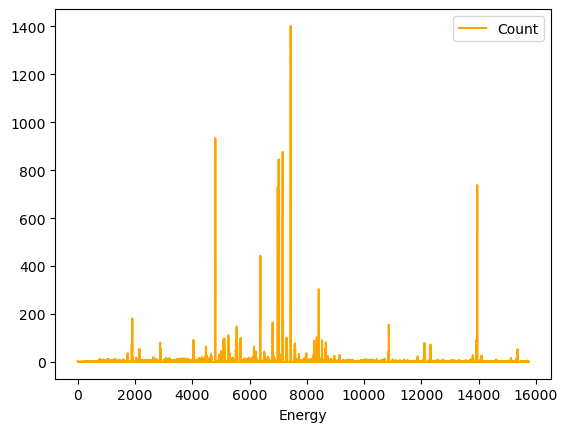

In [4]:
chan1.savgol_baseline_subtract()

chan1.plot_channel(True)

# Testing second deriviative savgol peak finding

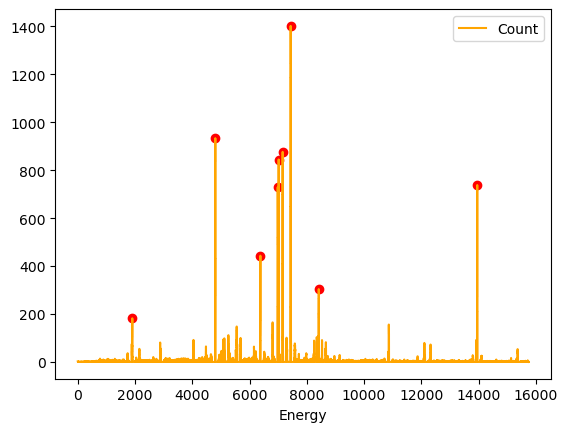

In [5]:
chan1.scipy_peaks()
chan1.plot_channel(True, True)

# Working with algotihimic alignment of peaks

Not working channels are numbers: 163, 255, 229, 33,43,99

259191.39814814815 47294.73144781676


(array([ 1.,  5.,  7., 13., 10., 12., 15., 16., 14., 15.]),
 array([139828. , 159293.9, 178759.8, 198225.7, 217691.6, 237157.5,
        256623.4, 276089.3, 295555.2, 315021.1, 334487. ]),
 <BarContainer object of 10 artists>)

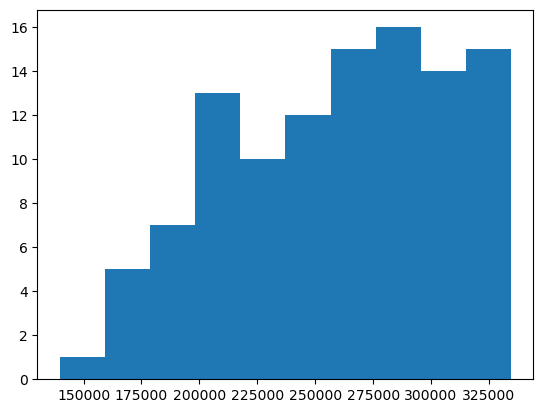

In [6]:
channel_lengths = []
for channel_name in sample.channels.keys():
    chan_x = sample[channel_name]
    # print(len(chan_x.energy))
    channel_lengths.append(len(chan_x.energy))

print(np.mean(channel_lengths), np.std(channel_lengths))
plt.hist(channel_lengths)


In [7]:
# bad_channels = ['chan163', 'chan255', 'chan229', 'chan33', 'chan43', 'chan99']
# for channel_name in bad_channels:
#     chan_x = sample[channel_name]
#     print(len(chan_x.energy))
#     # chan_x.savgol_baseline_subtract()
#     chan_x.scipy_peaks()
#     chan_x.plot_channel(False, True, name = channel_name)

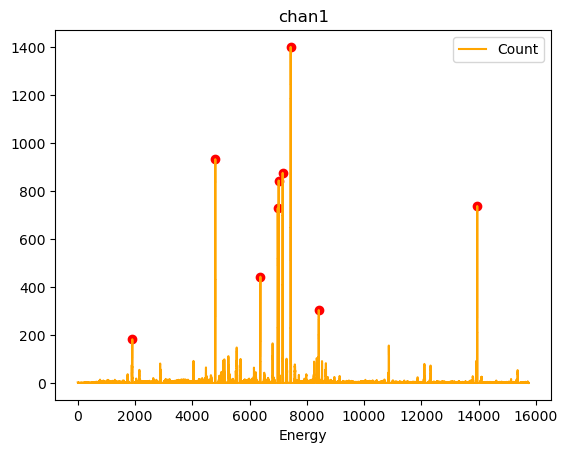

In [8]:
for channel_name in ['chan1']:
    chan_x = sample[channel_name]

    chan_x.savgol_baseline_subtract()
    chan_x.scipy_peaks()
    chan_x.plot_channel(True, True, name = channel_name)

In [9]:
for chan in sample.channels.values():
    chan.savgol_baseline_subtract()
    chan.scipy_peaks()


In [10]:
sample.algorithmic_aligning()
# sample.waterfall_plot_particle()

In [11]:
sample.sum_channels()

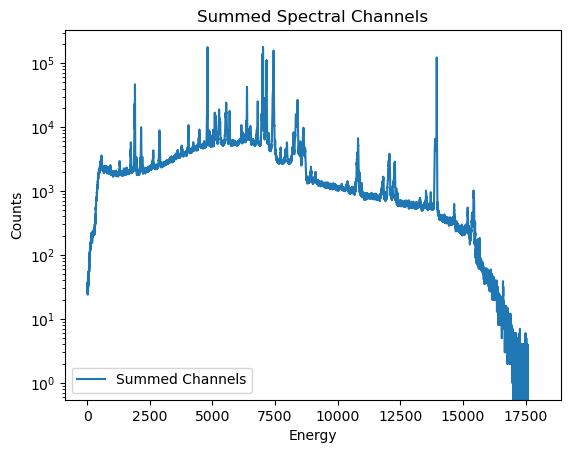

In [12]:
sample.plot_summed_channels()


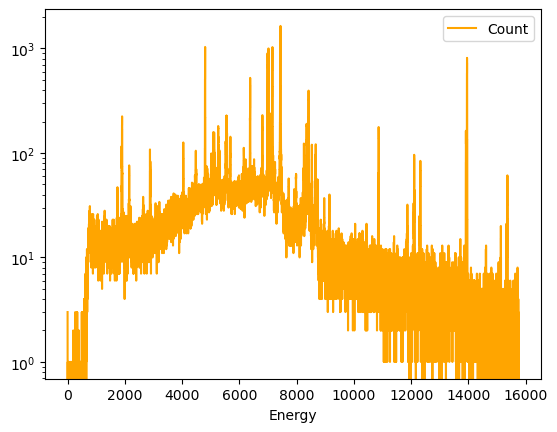

In [13]:
chan1.plot_channel()

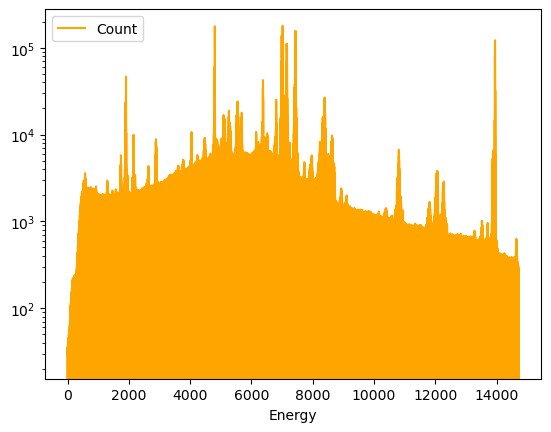

In [14]:
sample.summed_channel.plot_channel(with_peaks= True)

In [ ]:
sample.find_channels_s2n()
sample.find_particle_s2n()

In [ ]:
sample.find_s2n_zscore()

0.09667364890427474